In [1025]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import scipy.stats as stats



In [1026]:
dset=pd.read_csv('CARS.csv')

In [1027]:
dset.shape

(428, 15)

In [1028]:
dset.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      2
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [1029]:
dset.nunique()

Make            38
Model          425
Type             6
Origin           3
DriveTrain       3
MSRP           410
Invoice        425
EngineSize      43
Cylinders        7
Horsepower     110
MPG_City        28
MPG_Highway     33
Weight         348
Wheelbase       40
Length          67
dtype: int64

In [1030]:
dset['Cylinders']=dset['Cylinders'].fillna(dset['Cylinders'].median())

In [1031]:
dset.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      0
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [1032]:
dset.shape

(428, 15)

In [1033]:
dset.describe()

,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,3.196729,5.808411,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,1.108595,1.554844,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000
max,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


In [1034]:
dset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    object 
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    428 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 50.3+ KB


In [1035]:
dset['MSRP']=dset['MSRP'].str.replace('$','')
dset['MSRP']=dset['MSRP'].str.replace(',','')
dset['Invoice']=dset['Invoice'].str.replace('$','')
dset['Invoice']=dset['Invoice'].str.replace(',','')




In [1036]:
dset['MSRP']=dset['MSRP'].astype(float)
dset['Invoice']=dset['Invoice'].astype(float)

In [1037]:
dset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    float64
 6   Invoice      428 non-null    float64
 7   EngineSize   428 non-null    float64
 8   Cylinders    428 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(4), int64(6), object(5)
memory usage: 50.3+ KB


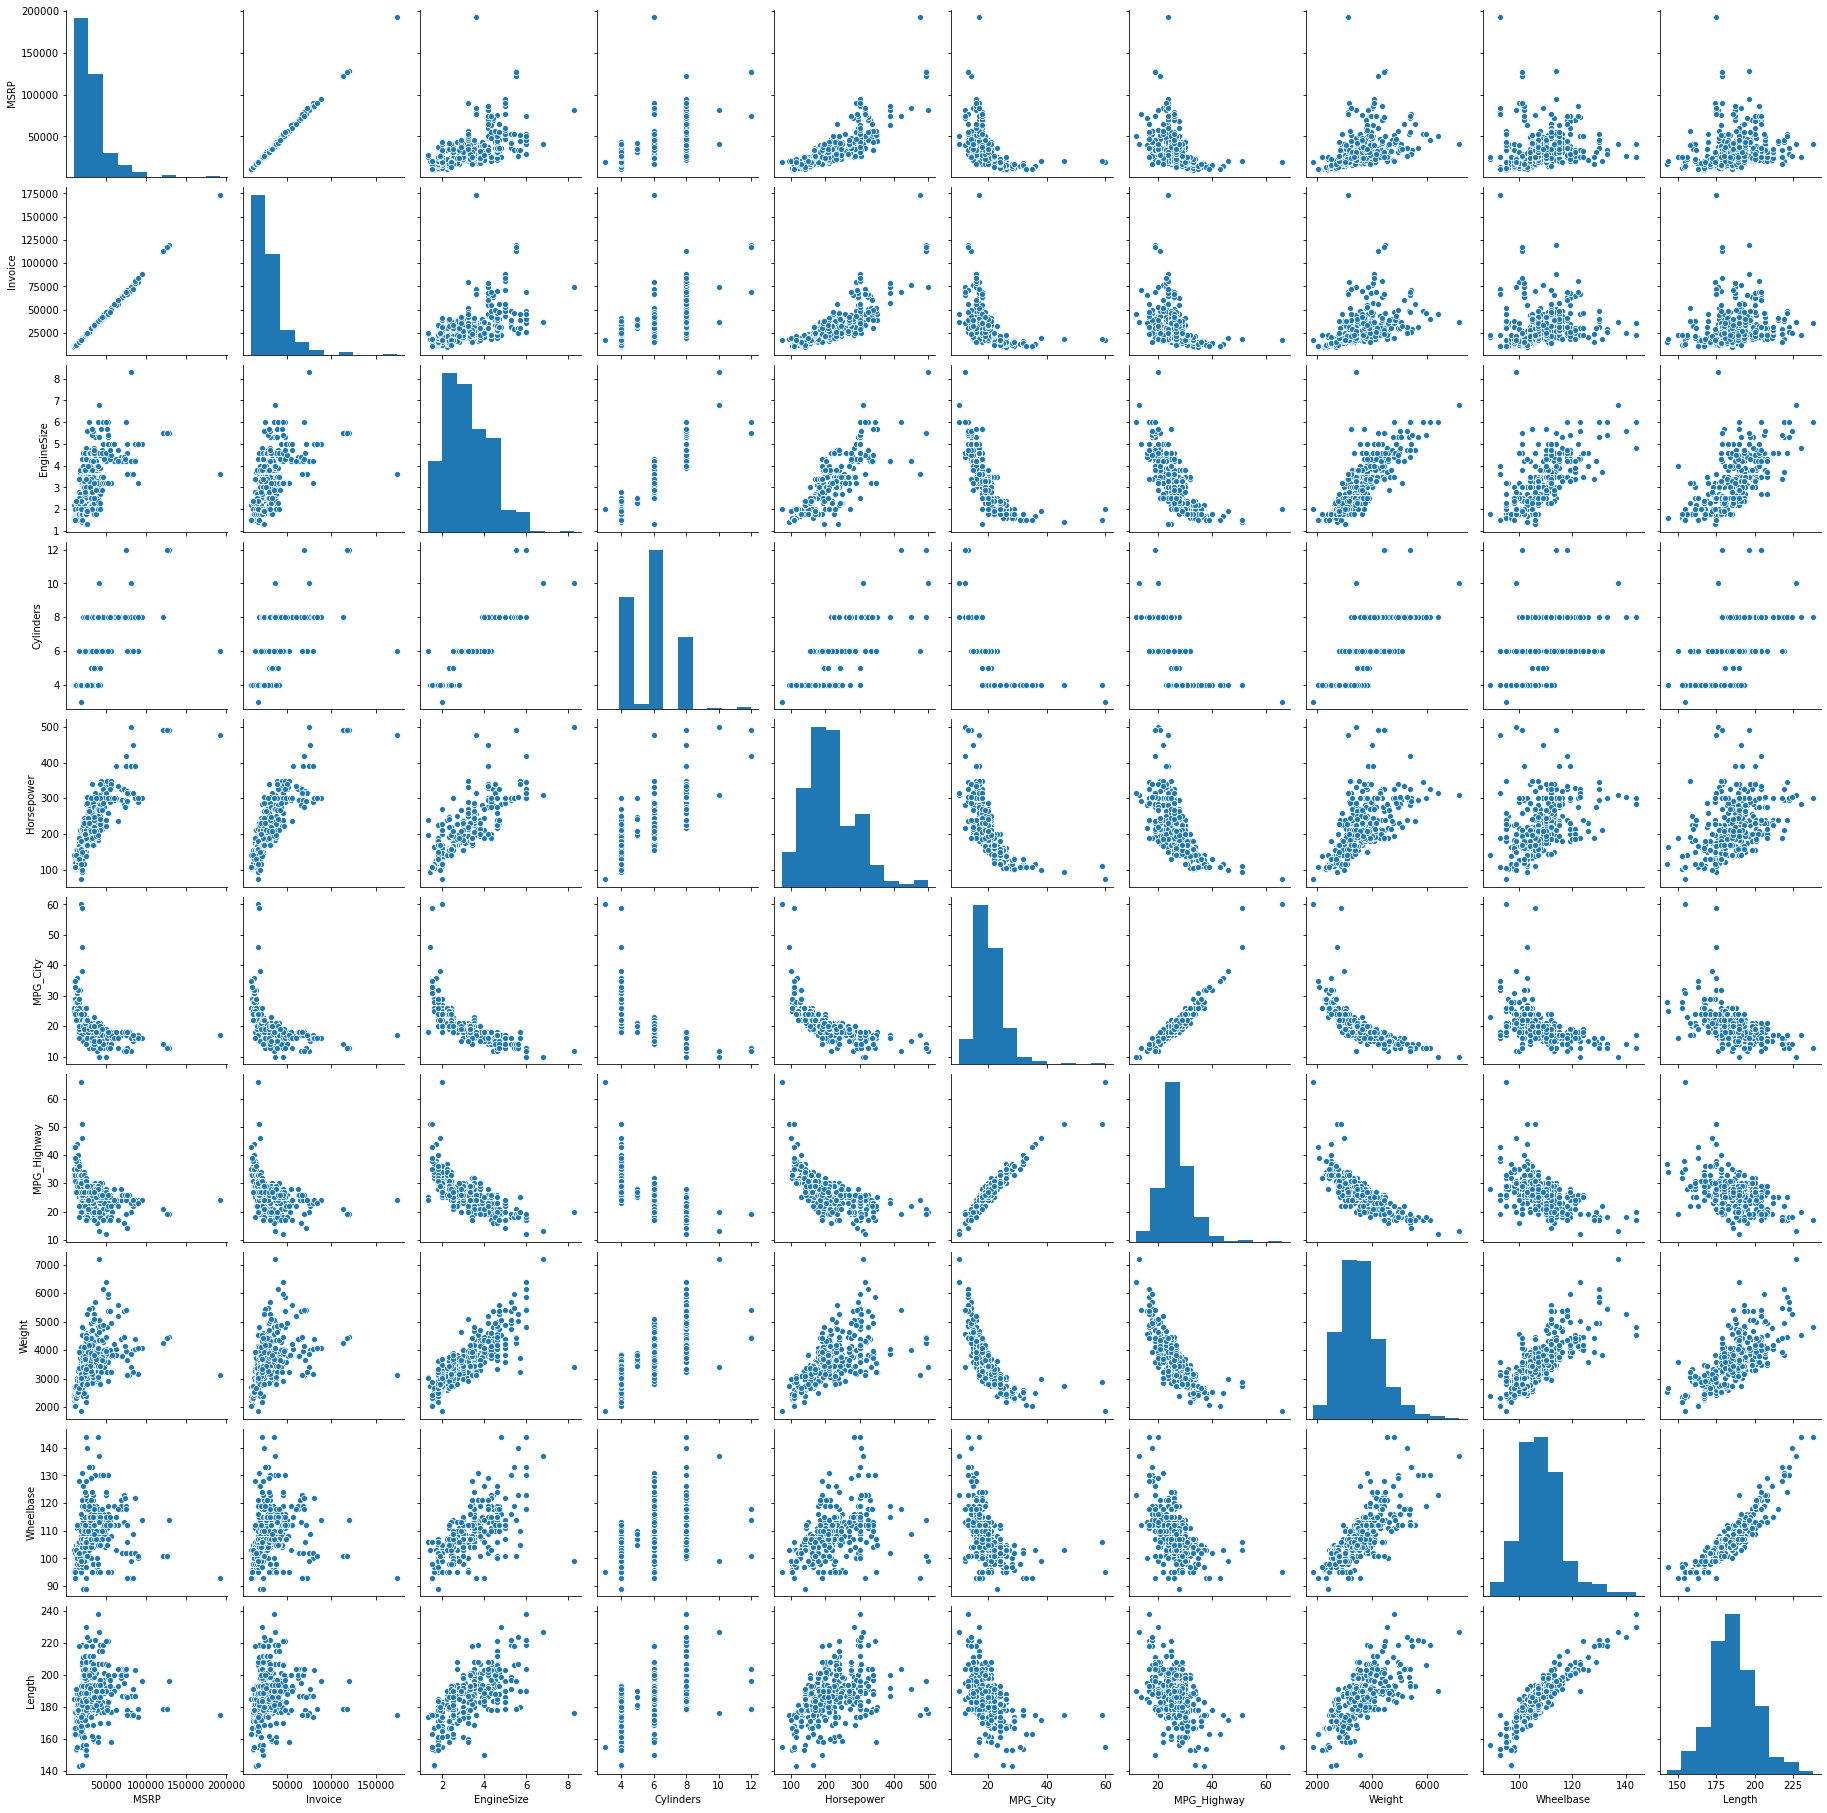

In [1038]:
sns.pairplot(dset)

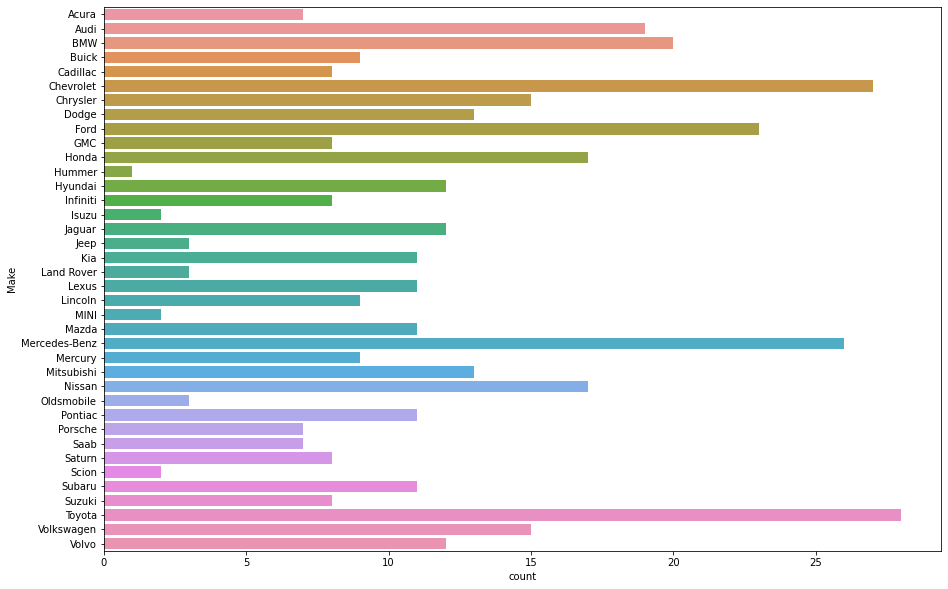

In [1039]:
plt.figure(figsize=(15,10))
sns.countplot(y='Make',data=dset)

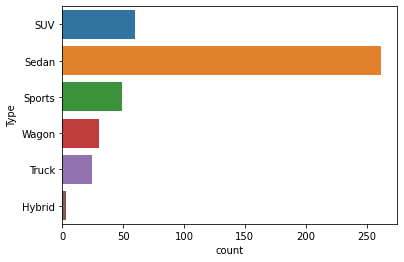

In [1040]:
sns.countplot(y='Type',data=dset)

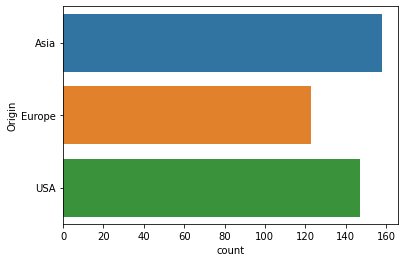

In [1041]:
sns.countplot(y='Origin',data=dset)

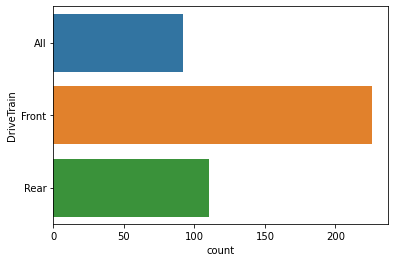

In [1042]:
sns.countplot(y='DriveTrain',data=dset)

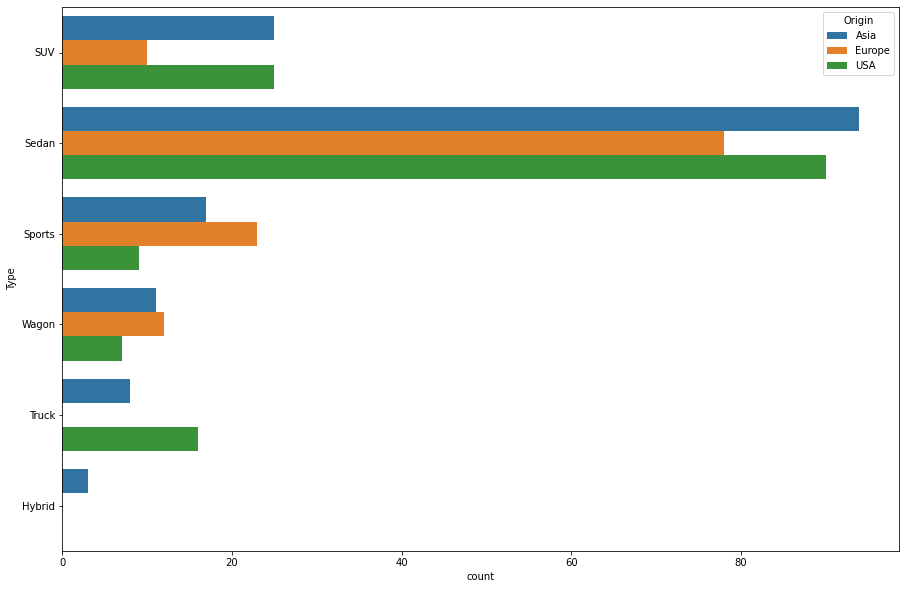

In [1043]:
plt.figure(figsize=(15,10))
sns.countplot(y='Type',hue='Origin',data=dset)

In [1044]:
categorical_features=[feature for feature in dset.columns if dset[feature].dtype=='O']

In [1045]:
categorical_features

['Make', 'Model', 'Type', 'Origin', 'DriveTrain']

In [1046]:
dset['MSRP'].mean()

32774.85514018692

In [1047]:
dset.corr()

,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
MSRP,1.000000,0.999132,0.571753,0.649366,0.826945,-0.475020,-0.439622,0.448426,0.152000,0.172037
Invoice,0.999132,1.000000,0.564498,0.644870,0.823746,-0.470442,-0.434585,0.442332,0.148328,0.166586
EngineSize,0.571753,0.564498,1.000000,0.900702,0.787435,-0.709471,-0.717302,0.807867,0.636517,0.637448
Cylinders,0.649366,0.644870,0.900702,1.000000,0.810169,-0.684356,-0.676035,0.740897,0.546474,0.546308
Horsepower,0.826945,0.823746,0.787435,0.810169,1.000000,-0.676699,-0.647195,0.630796,0.387398,0.381554
MPG_City,-0.475020,-0.470442,-0.709471,-0.684356,-0.676699,1.000000,0.941021,-0.737966,-0.507284,-0.501526
MPG_Highway,-0.439622,-0.434585,-0.717302,-0.676035,-0.647195,0.941021,1.000000,-0.790989,-0.524661,-0.466092
Weight,0.448426,0.442332,0.807867,0.740897,0.630796,-0.737966,-0.790989,1.000000,0.760703,0.690021
Wheelbase,0.152000,0.148328,0.636517,0.546474,0.387398,-0.507284,-0.524661,0.760703,1.000000,0.889195
Length,0.172037,0.166586,0.637448,0.546308,0.381554,-0.501526,-0.466092,0.690021,0.889195,1.000000


In [1048]:
dset.nunique()

Make            38
Model          425
Type             6
Origin           3
DriveTrain       3
MSRP           410
Invoice        425
EngineSize      43
Cylinders        7
Horsepower     110
MPG_City        28
MPG_Highway     33
Weight         348
Wheelbase       40
Length          67
dtype: int64

In [1049]:
dset.drop(['Model'],axis=1,inplace=True)

In [1050]:
dset



,Make,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,SUV,Asia,All,36945.0,33337.0,3.5,6.0,265,17,23,4451,106,189
1,Acura,Sedan,Asia,Front,23820.0,21761.0,2.0,4.0,200,24,31,2778,101,172
2,Acura,Sedan,Asia,Front,26990.0,24647.0,2.4,4.0,200,22,29,3230,105,183
3,Acura,Sedan,Asia,Front,33195.0,30299.0,3.2,6.0,270,20,28,3575,108,186
4,Acura,Sedan,Asia,Front,43755.0,39014.0,3.5,6.0,225,18,24,3880,115,197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,Volvo,Sedan,Europe,Front,40565.0,38203.0,2.4,5.0,197,21,28,3450,105,186
424,Volvo,Sedan,Europe,Front,42565.0,40083.0,2.3,5.0,242,20,26,3450,105,186
425,Volvo,Sedan,Europe,Front,45210.0,42573.0,2.9,6.0,268,19,26,3653,110,190
426,Volvo,Wagon,Europe,Front,26135.0,24641.0,1.9,4.0,170,22,29,2822,101,180


In [1051]:
numerical_features=[feature for feature in dset.columns if dset[feature].dtype!='O']

In [1052]:
numerical_features

['MSRP',
 'Invoice',
 'EngineSize',
 'Cylinders',
 'Horsepower',
 'MPG_City',
 'MPG_Highway',
 'Weight',
 'Wheelbase',
 'Length']

In [1053]:
discrete_features=[feature for feature in numerical_features if len(dset[feature].unique())<10] 

In [1054]:
discrete_features

['Cylinders']

In [1055]:
len(dset['Cylinders'].unique())

7

In [1056]:
continous_features=[feature for feature in numerical_features if feature not in discrete_features and feature not in ['MSRP']]

In [1057]:
continous_features

['Invoice',
 'EngineSize',
 'Horsepower',
 'MPG_City',
 'MPG_Highway',
 'Weight',
 'Wheelbase',
 'Length']

In [1058]:
len(continous_features)

8

In [1059]:
categorical_features=[feature for feature in dset.columns if dset[feature].dtype=='O']

In [1060]:
categorical_features

['Make', 'Type', 'Origin', 'DriveTrain']

In [1061]:
for feature in ['MSRP']:
    print('\n')
    print(feature)
    print((dset[feature]+1).transform([np.log,np.sqrt,np.reciprocal,np.exp]).agg(['skew','kurtosis']).transpose())



MSRP
                skew  kurtosis
log         0.464429  0.362923
sqrt        1.389891  3.537598
reciprocal  0.811997  0.427740
exp              NaN       NaN


In [1062]:
dset['MSRP_log']=np.log(dset['MSRP'])

In [1063]:
dset=dset.drop(['MSRP'],axis=1)

In [1064]:
X=dset.drop(['MSRP_log'],axis=1)
y=dset['MSRP_log']

In [1065]:
X.agg(['skew','kurtosis']).transpose()

,skew,kurtosis
Invoice,2.834740,13.946164
EngineSize,0.708152,0.541944
Cylinders,0.592367,0.454657
Horsepower,0.930331,1.552159
MPG_City,2.782072,15.791147
MPG_Highway,1.252395,6.045611
Weight,0.891824,1.688789
Wheelbase,0.962287,2.133649
Length,0.181977,0.614725


In [1066]:
for feature in continous_features:
    print('\n')
    print(feature)
    print((X[feature]+1).transform([np.log,np.sqrt,np.reciprocal,np.exp]).agg(['skew','kurtosis']).transpose())



Invoice
                skew  kurtosis
log         0.515293  0.438168
sqrt        1.438369  3.725386
reciprocal  0.739220  0.283841
exp              NaN       NaN


EngineSize
                 skew    kurtosis
log          0.102651   -0.602352
sqrt         0.385945   -0.239531
reciprocal   0.398169   -0.579000
exp         16.732803  316.166992


Horsepower
                skew  kurtosis
log        -0.067389 -0.124156
sqrt        0.405769  0.288683
reciprocal  0.000000  0.000000
exp              NaN       NaN


MPG_City
                 skew    kurtosis
log          0.881917    3.142598
sqrt         1.687254    7.225687
reciprocal   0.000000    0.000000
exp         17.933343  337.217719


MPG_Highway
                 skew    kurtosis
log         -0.031608    1.547164
sqrt         0.542704    2.777720
reciprocal   0.000000    0.000000
exp         20.688161  428.000000


Weight
                skew  kurtosis
log         0.131987  0.357099
sqrt        0.499958  0.772626
reciprocal  0.000

In [1068]:
X['EngineSize_log']=np.log(1+X['EngineSize'])

In [1070]:
X['Horsepower_rec']=1/(1+X['Horsepower'])

In [1072]:
X['MPG_City_rec']=1/(1+X['MPG_City'])

In [1074]:
X['MPG_Highway_rec']=1/(1+X['MPG_Highway'])

In [1076]:
X['Weight_rec']=1/(1+X['Weight'])

In [1078]:
X['Wheelbase_rec']=1/(1+X['Wheelbase'])

In [1080]:
X['Length_rec']=1/(1+X['Length'])

In [1082]:
X['Invoice_log']=np.log(1+X['Invoice'])

In [1084]:
X[continous_features]

,Invoice,EngineSize,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,2.725744,1.322409,6.880142,1.121832,3.350119,4.196443,0.449599,17.935826
1,2.714676,0.999457,6.464671,1.150078,3.671020,4.096533,0.449597,17.182654
2,2.718084,1.101605,6.464671,1.143599,3.598765,4.129460,0.449599,17.674795
3,2.723409,1.269062,6.908055,1.136017,3.560871,4.151102,0.449599,17.805938
4,2.729416,1.322409,6.637476,1.127008,3.395470,4.168260,0.449601,18.276295
...,...,...,...,...,...,...,...,...
423,2.728937,1.101605,6.442609,1.139964,3.560871,4.143559,0.449599,17.805938
424,2.730026,1.077444,6.745122,1.136017,3.481135,4.143559,0.449599,17.805938
425,2.731367,1.211037,6.896947,1.131716,3.481135,4.155651,0.449600,17.978848
426,2.718077,0.971402,6.228791,1.143599,3.598765,4.100009,0.449597,17.542364


In [1085]:
X=X.drop(['Invoice','EngineSize','Horsepower','MPG_City','MPG_Highway','Weight','Wheelbase','Length'],axis=1)

In [1086]:
X.columns

Index(['Make', 'Type', 'Origin', 'DriveTrain', 'Cylinders', 'EngineSize_log',
       'Horsepower_rec', 'MPG_City_rec', 'MPG_Highway_rec', 'Weight_rec',
       'Wheelbase_rec', 'Length_rec', 'Invoice_log'],
      dtype='object')

In [1087]:
X_dumm=pd.get_dummies(X,categorical_features)


In [1288]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_dumm,y,test_size=0.2,random_state=0)

In [1289]:
X_train

,Cylinders,EngineSize_log,Horsepower_rec,MPG_City_rec,MPG_Highway_rec,Weight_rec,Wheelbase_rec,Length_rec,Invoice_log,Make_Acura,...,Type_Sedan,Type_Sports,Type_Truck,Type_Wagon,Origin_Asia,Origin_Europe,Origin_USA,DriveTrain_All,DriveTrain_Front,DriveTrain_Rear
255,6.0,0.764311,0.138663,0.468161,0.225271,0.194631,0.689846,0.054191,1.314589,0,...,1,0,0,0,0,1,0,0,0,1
410,8.0,0.876570,0.126453,0.470144,0.225271,0.193344,0.689846,0.053298,1.315764,0,...,1,0,0,0,0,1,0,0,1,0
229,8.0,0.949703,0.123975,0.477422,0.244394,0.190321,0.689845,0.050892,1.317269,0,...,0,0,0,0,0,0,1,1,0,0
5,6.0,0.842605,0.130933,0.470144,0.227507,0.193463,0.689845,0.051877,1.316566,1,...,1,0,0,0,1,0,0,0,1,0
427,5.0,0.753746,0.132943,0.468161,0.221156,0.193604,0.689846,0.053175,1.315223,0,...,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,4.0,0.719013,0.143867,0.465099,0.211013,0.196233,0.689846,0.053675,1.310031,0,...,1,0,0,0,0,0,1,0,1,0
192,8.0,0.888770,0.124444,0.470144,0.219256,0.193501,0.689845,0.052454,1.317169,0,...,1,0,0,0,0,1,0,0,0,1
117,6.0,0.856839,0.132090,0.472566,0.235092,0.192288,0.689844,0.050681,1.310846,0,...,0,0,1,0,0,0,1,0,0,1
47,6.0,0.835125,0.136033,0.469106,0.223158,0.193206,0.689845,0.053052,1.313042,0,...,0,0,0,0,0,0,1,0,1,0


In [1290]:
y_train

255    10.382203
410    10.577324
229    10.873793
5      10.738568
427    10.467238
         ...    
323     9.783295
192    10.819678
117     9.914180
47     10.186597
172     9.641408
Name: MSRP_log, Length: 342, dtype: float64

In [1291]:
order_cols.scores_

array([1.39514486e+02, 3.61157538e+00, 1.86059831e-01, 1.12348291e-02,
       1.81971745e-01, 4.70879797e-03, 5.38052970e-10, 2.12169763e-02,
       2.76159204e-03, 3.38000000e+02, 3.27000000e+02, 3.14941176e+02,
       3.36000000e+02, 3.36000000e+02, 3.19000000e+02, 2.99909091e+02,
       3.31000000e+02, 3.22000000e+02, 3.37000000e+02, 3.32000000e+02,
       1.70000000e+02, 3.33000000e+02, 3.10571429e+02, 3.40000000e+02,
       2.79000000e+02, 3.39000000e+02, 3.15454545e+02, 3.39000000e+02,
       3.36000000e+02, 3.33000000e+02, 3.40000000e+02, 3.15454545e+02,
       3.20000000e+02, 2.57000000e+02, 3.15750000e+02, 3.15600000e+02,
                  nan, 3.14000000e+02, 3.36000000e+02, 3.37000000e+02,
       3.38000000e+02, 3.40000000e+02, 3.14000000e+02, 3.36000000e+02,
       3.10875000e+02, 3.30000000e+02, 3.33000000e+02, 3.40000000e+02,
       2.74900000e+02, 1.34194030e+02, 2.92658537e+02, 3.19000000e+02,
       3.10160000e+02, 2.09992188e+02, 2.39711340e+02, 2.19153846e+02,
      

In [1292]:
X_scores=pd.DataFrame(order_cols.scores_,columns=['scores'])

In [1293]:
 X_cols=pd.DataFrame(X_train.columns)

In [1294]:
df=pd.concat([X_cols,X_scores],axis=1)

In [1295]:
df.columns=['Features','scores']

In [1296]:
df.sort_values('scores',ascending=False)

,Features,scores
23,Make_Isuzu,3.400000e+02
47,Type_Hybrid,3.400000e+02
30,Make_MINI,3.400000e+02
41,Make_Scion,3.400000e+02
27,Make_Land Rover,3.390000e+02
25,Make_Jeep,3.390000e+02
40,Make_Saturn,3.380000e+02
9,Make_Acura,3.380000e+02
39,Make_Saab,3.370000e+02
18,Make_GMC,3.370000e+02


In [1297]:
from sklearn.feature_selection import VarianceThreshold

In [1298]:
var_threshold=VarianceThreshold(threshold=0)

In [1299]:
var_threshold.fit(X_train)


VarianceThreshold(threshold=0)

In [1300]:
var_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [1301]:
sum(var_threshold.get_support())

58

In [1302]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_threshold.get_support()]]

print(len(constant_columns))

1


In [1303]:
for col in constant_columns:
    print(col)

Make_Oldsmobile


In [1304]:
X_train=X_train.drop(constant_columns,axis=1)
    

In [1305]:
X_test=X_test.drop(constant_columns,axis=1)

In [1306]:
X_train.columns

Index(['Cylinders', 'EngineSize_log', 'Horsepower_rec', 'MPG_City_rec',
       'MPG_Highway_rec', 'Weight_rec', 'Wheelbase_rec', 'Length_rec',
       'Invoice_log', 'Make_Acura', 'Make_Audi', 'Make_BMW', 'Make_Buick',
       'Make_Cadillac', 'Make_Chevrolet', 'Make_Chrysler', 'Make_Dodge',
       'Make_Ford', 'Make_GMC', 'Make_Honda', 'Make_Hummer', 'Make_Hyundai',
       'Make_Infiniti', 'Make_Isuzu', 'Make_Jaguar', 'Make_Jeep', 'Make_Kia',
       'Make_Land Rover', 'Make_Lexus', 'Make_Lincoln', 'Make_MINI',
       'Make_Mazda', 'Make_Mercedes-Benz', 'Make_Mercury', 'Make_Mitsubishi',
       'Make_Nissan', 'Make_Pontiac', 'Make_Porsche', 'Make_Saab',
       'Make_Saturn', 'Make_Scion', 'Make_Subaru', 'Make_Suzuki',
       'Make_Toyota', 'Make_Volkswagen', 'Make_Volvo', 'Type_Hybrid',
       'Type_SUV', 'Type_Sedan', 'Type_Sports', 'Type_Truck', 'Type_Wagon',
       'Origin_Asia', 'Origin_Europe', 'Origin_USA', 'DriveTrain_All',
       'DriveTrain_Front', 'DriveTrain_Rear'],
      dtyp

In [1307]:
from sklearn.feature_selection import mutual_info_regression
info = mutual_info_regression(X_train, y_train)


In [1308]:
info = pd.Series(info)
info.index = X_train.columns
info.sort_values(ascending=False)

Invoice_log           3.129065
Horsepower_rec        0.905177
MPG_City_rec          0.556087
EngineSize_log        0.551567
Weight_rec            0.506039
Cylinders             0.394609
MPG_Highway_rec       0.380241
Length_rec            0.257966
Wheelbase_rec         0.244674
Origin_Europe         0.196043
DriveTrain_Front      0.150876
Origin_Asia           0.128213
DriveTrain_Rear       0.077689
Type_Sports           0.070570
Make_Mercedes-Benz    0.051600
Origin_USA            0.049765
Make_Kia              0.034943
Make_BMW              0.032595
Make_Porsche          0.031000
Make_Lincoln          0.030360
Make_Toyota           0.029472
Make_Volvo            0.025493
Make_Suzuki           0.023272
Make_Audi             0.022776
Type_SUV              0.019689
Make_Cadillac         0.019475
Make_Jaguar           0.018754
Make_Subaru           0.018644
Make_Mitsubishi       0.017311
Make_Nissan           0.016317
Make_Mercury          0.013068
Make_Chevrolet        0.011730
Make_Hyu

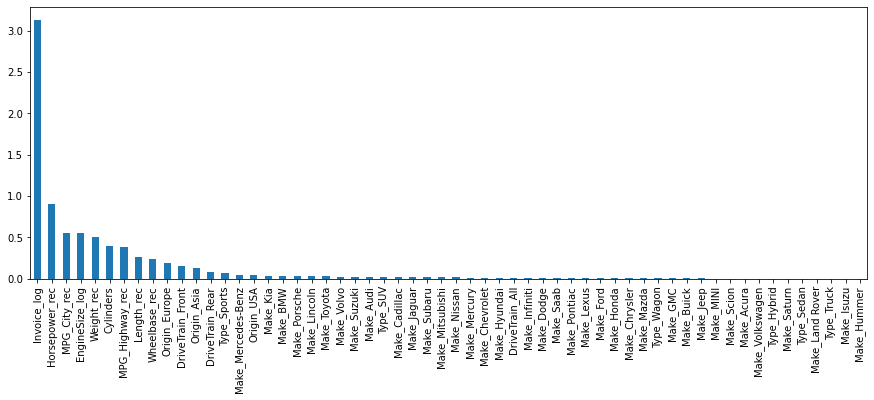

In [1309]:
info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [1310]:
from sklearn.feature_selection import SelectPercentile
imp_columns = SelectPercentile(mutual_info_regression, percentile=20)
imp_columns.fit(X_train, y_train)

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x000001F76685AE50>)

In [1311]:
len(X_train.columns[imp_columns.get_support()])

12

In [1312]:
X_train.columns[imp_columns.get_support()]

Index(['Cylinders', 'EngineSize_log', 'Horsepower_rec', 'MPG_City_rec',
       'MPG_Highway_rec', 'Weight_rec', 'Wheelbase_rec', 'Length_rec',
       'Invoice_log', 'Origin_Asia', 'Origin_Europe', 'DriveTrain_Front'],
      dtype='object')

In [1313]:
X_train=X_train[['Cylinders', 'EngineSize_log', 'Horsepower_rec', 'MPG_City_rec',
       'MPG_Highway_rec', 'Weight_rec', 'Wheelbase_rec', 'Length_rec',
       'Invoice_log', 'Origin_Europe', 'DriveTrain_Front']]

In [1314]:
X_train

,Cylinders,EngineSize_log,Horsepower_rec,MPG_City_rec,MPG_Highway_rec,Weight_rec,Wheelbase_rec,Length_rec,Invoice_log,Origin_Europe,DriveTrain_Front
255,6.0,0.764311,0.138663,0.468161,0.225271,0.194631,0.689846,0.054191,1.314589,1,0
410,8.0,0.876570,0.126453,0.470144,0.225271,0.193344,0.689846,0.053298,1.315764,1,1
229,8.0,0.949703,0.123975,0.477422,0.244394,0.190321,0.689845,0.050892,1.317269,0,0
5,6.0,0.842605,0.130933,0.470144,0.227507,0.193463,0.689845,0.051877,1.316566,0,1
427,5.0,0.753746,0.132943,0.468161,0.221156,0.193604,0.689846,0.053175,1.315223,1,0
...,...,...,...,...,...,...,...,...,...,...,...
323,4.0,0.719013,0.143867,0.465099,0.211013,0.196233,0.689846,0.053675,1.310031,0,1
192,8.0,0.888770,0.124444,0.470144,0.219256,0.193501,0.689845,0.052454,1.317169,1,0
117,6.0,0.856839,0.132090,0.472566,0.235092,0.192288,0.689844,0.050681,1.310846,0,0
47,6.0,0.835125,0.136033,0.469106,0.223158,0.193206,0.689845,0.053052,1.313042,0,1


In [1315]:
X_test=X_test[['Cylinders', 'EngineSize_log', 'Horsepower_rec', 'MPG_City_rec',
       'MPG_Highway_rec', 'Weight_rec', 'Wheelbase_rec', 'Length_rec',
       'Invoice_log', 'Origin_Europe', 'DriveTrain_Front']]

In [1316]:
from sklearn.preprocessing import StandardScaler
scaler_s= StandardScaler()
X_train=scaler_s.fit_transform(X_train)
X_test=scaler_s.transform(X_test)

In [1317]:
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
import math

In [1318]:
from sklearn.ensemble import RandomForestRegressor


In [1319]:
reg_2=RandomForestRegressor(random_state=0) 
reg_2.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

In [1320]:
y_pred_2=reg_2.predict(X_test)

In [1321]:
mean_squared_error(y_pred_2,y_test)

0.0005706879011069878

In [1322]:
from xgboost import XGBRegressor
reg_1=XGBRegressor()
reg_1.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [1323]:
y_pred_xgb=reg_1.predict(X_test)

In [1324]:
import math

In [1331]:
math.sqrt(mean_squared_error(y_pred_2,y_test))

0.0238890749320058

In [1332]:
math.sqrt(mean_squared_error(y_pred_xgb,y_test))

0.03160986154647246

In [1326]:
from sklearn.ensemble import RandomForestRegressor
reg_2=RandomForestRegressor(n_estimators=10,random_state=0)
reg_2.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [1335]:
from sklearn.tree import DecisionTreeRegressor
reg_3=DecisionTreeRegressor()
reg_3.fit(X_train,y_train)

DecisionTreeRegressor()

In [1336]:
y_pred_3=reg_3.predict(X_test)

In [1327]:
reg_2.score(X_test,y_test)

0.9975817849070723

In [1328]:
reg_1.score(X_test,y_test)

0.995963134290433

In [1337]:
reg_3.score(X_test,y_test)

0.9968087079414378

In [1329]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(estimator=reg_1,X=X_train,y=y_train,cv=10)
print('Accuarcy:{:.2f}%'.format(score.mean()*100))

Accuarcy:99.19%


In [1330]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(estimator=reg_2,X=X_train,y=y_train,cv=10)
print('Accuarcy:{:.2f}%'.format(score.mean()*100))


Accuarcy:99.18%


In [1338]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(estimator=reg_3,X=X_train,y=y_train,cv=10)
print('Accuarcy:{:.2f}%'.format(score.mean()*100))


Accuarcy:99.32%


In [1340]:
from sklearn.model_selection import RandomizedSearchCV

In [1341]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
min_samples_split = [2, 5, 10,14]
min_samples_leaf = [1, 2, 4,6,8]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['mse']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['mse']}


In [1343]:
rf_randomcv=RandomizedSearchCV(estimator=reg_2,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,random_state=42,n_jobs=-1)
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.7min finished


RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(n_estimators=10,
                                                   random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['mse'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},


In [1344]:
rf_randomcv.best_params_

{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 780,
 'criterion': 'mse'}

In [1346]:
params_grid={
    'n_estimators':[rf_randomcv.best_params_['n_estimators']-200,rf_randomcv.best_params_['n_estimators']-100,rf_randomcv.best_params_['n_estimators'],rf_randomcv.best_params_['n_estimators']+100,rf_randomcv.best_params_['n_estimators']+200]
             ,'min_samples_split':[rf_randomcv.best_params_['min_samples_split'],rf_randomcv.best_params_['min_samples_split']+2,rf_randomcv.best_params_['min_samples_split']+4]
             ,'min_samples_leaf':[rf_randomcv.best_params_['min_samples_leaf'],rf_randomcv.best_params_['min_samples_leaf']+1,rf_randomcv.best_params_['min_samples_leaf']+2]
             ,'max_features':[rf_randomcv.best_params_['max_features']],'criterion':[rf_randomcv.best_params_['criterion']],'max_depth':[rf_randomcv.best_params_['max_depth']]}

In [1347]:
print(params_grid)

{'n_estimators': [600, 700, 800, 900, 1000], 'min_samples_split': [5, 7, 9], 'min_samples_leaf': [1, 2, 3], 'max_features': ['auto'], 'criterion': ['mse'], 'max_depth': [780]}


In [1348]:
from sklearn.model_selection import GridSearchCV

In [1350]:
gcv=GridSearchCV(estimator=reg_2,param_grid=params_grid,cv=10,verbose=2,n_jobs=-1)

In [1352]:
gcv.fit(X_train,y_train)

Fitting 10 folds for each of 45 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  3.4min finished


GridSearchCV(cv=10,
             estimator=RandomForestRegressor(n_estimators=10, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['mse'], 'max_depth': [780],
                         'max_features': ['auto'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [5, 7, 9],
                         'n_estimators': [600, 700, 800, 900, 1000]},
             verbose=2)

In [1354]:
best_grid=gcv.best_params_

In [1355]:
reg_rf=RandomForestRegressor(n_estimators=1500,criterion='mse',max_depth=780,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',random_state=42)

In [1356]:
reg_rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=780, max_features='sqrt', n_estimators=1500,
                      random_state=42)

In [1357]:
y_pred_rf=reg_rf.predict(X_test)

In [1358]:
mean_squared_error(y_test,y_pred_rf)

0.005873026978112969